# Lesson 1 Key Concepts

## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

## Importing data

In [3]:
data = pd.read_csv('unit4.csv') 

In [4]:
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


In [5]:
data.shape

(90569, 28)

## Checking data types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90569 non-null  object 
 1   PVASTATE  90569 non-null  object 
 2   DOB       90569 non-null  int64  
 3   MDMAUD    90569 non-null  object 
 4   RECP3     90569 non-null  object 
 5   GENDER    90569 non-null  object 
 6   DOMAIN    90569 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  90569 non-null  object 
 9   HV1       90569 non-null  int64  
 10  HV2       90569 non-null  int64  
 11  HV3       90569 non-null  int64  
 12  HV4       90569 non-null  int64  
 13  IC1       90569 non-null  int64  
 14  IC2       90569 non-null  int64  
 15  IC3       90569 non-null  int64  
 16  IC4       90569 non-null  int64  
 17  IC5       90569 non-null  int64  
 18  VETERANS  90569 non-null  object 
 19  NUMPROM   90569 non-null  int64  
 20  CARDPROM  90569 non-null  in

## Checking for null values

In [7]:
nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
7,INCOME,0.222847
26,TIMELAG,0.106582
0,STATE,0.000000
15,IC3,0.000000
25,NGIFTALL,0.000000
24,RFA_2,0.000000
23,MAXADATE,0.000000
22,NUMPRM12,0.000000
21,CARDPM12,0.000000
20,CARDPROM,0.000000


## Checking the numerical values

In [8]:
numericals = data.select_dtypes(np.number)
numericals.head()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
0,3712,NaN,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,31,4.0,7.741935
1,5202,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3,18.0,15.666667
2,0,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,12.0,7.481481
3,2801,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16,9.0,6.812500
4,2001,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,37,14.0,6.864865


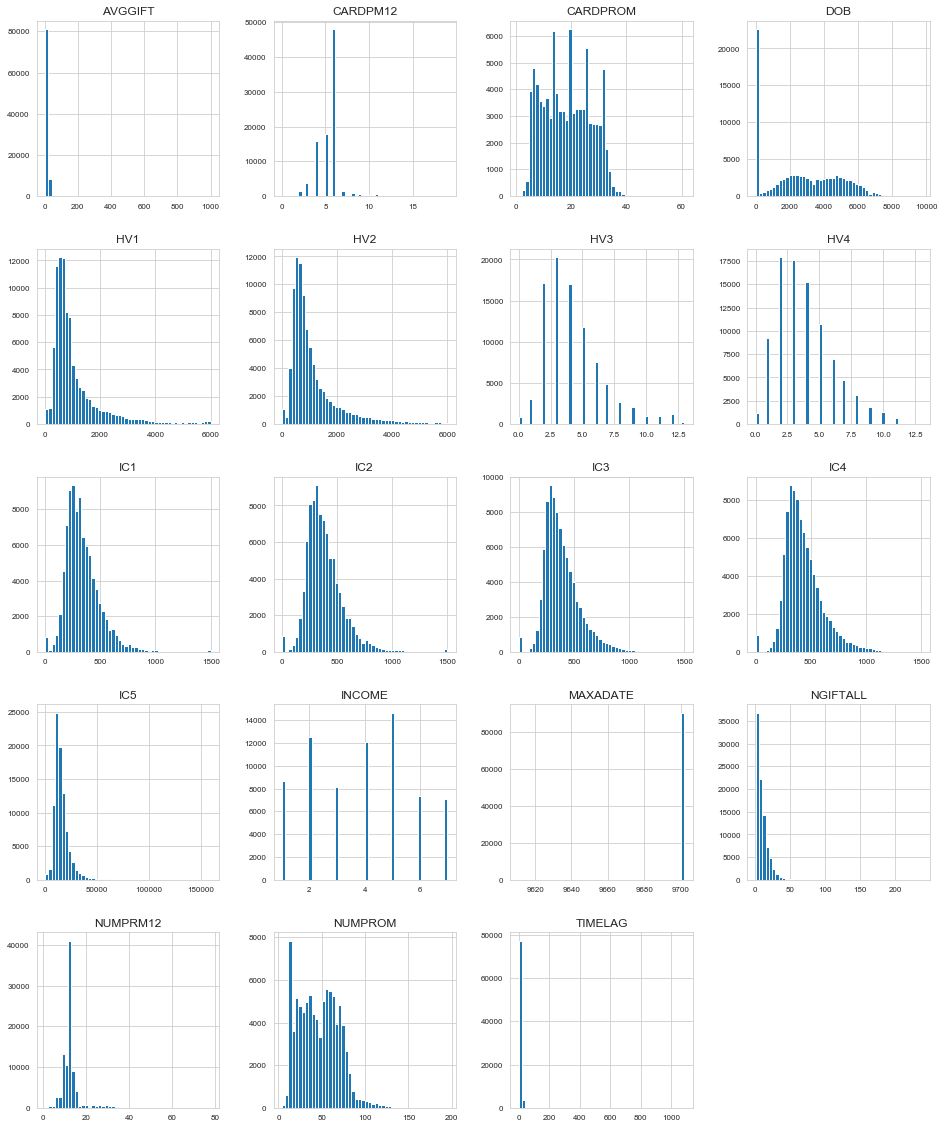

In [9]:
numericals.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 
# ; avoid having the matplotlib extra information

## Checking the **income's** histogram

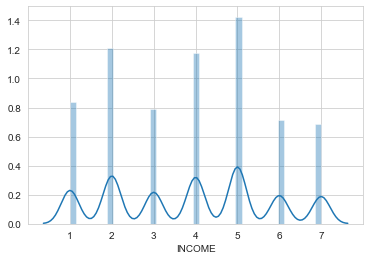

In [13]:
sns.distplot(data['INCOME'])

*   The INCOME might be an important factor in predicting the gift value, so even though it has a lot of null values, we will not drop the column.

*   We will later on try a more precise method to replace the null values, instead of simply replacing them by a constant value, mean or median.

*   We will use a similar method for the column TIMELAG .

*   Before going into our class activity for replacing nulls in other (less critical/ less diverse) columns - 4.01.1, lets do some more EDA

In [ ]:
# other EDA techniques or charts we might use?
print(data['DOB'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['DOB'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
#what about correlation? how do we build a correlation matrix? 

corrMatrix = numericals.corr()
print (corrMatrix)
#obv this is overwhelming with too many columns. 
#how could we subset a smaller list and then correlate?


In [ ]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Activity: Dealing with missing values.


Possible approaches for NULLs reminder: 

 A) delete rows/columns
 
Pros: Quick easy, might be irrelevant, satisfying, everything easier to consume

Cons: Losing important data

B) replace with median/mean/mode 

Pros: prevent data loss, ease of use, if data is normally distributed going to the mean is fine

Cons: affect the spread of the data + bias, standardising too much, bit blunt of an instrument

C) replace with a specific value (for categories) eg 'not reported'

Pros: honest approach, good way to flag up DQ issues, keeps transparancy

Cons: still lacks variation in the data, may affect performance 

D) use ML to predict missing values 

Pros: omit bias

Cons: overfit would be easy - exaggaerating trend, underfitting - would dilute our study, 
headache and loads of time

E) use algorithms eg KNN or random forest to fill missing values

Pros: No need to create a model, 

Cons: Time consuming esp in big data sets, can result in a not robust method - e.g. choice of distance functions can be Euclidean, Manhattan



**Drop:**

Let's consider the **gender** column. 

*   Can we guess in somehow what is the missing gender? **NO**. 
*   Can this column have any possible value compatible with a missing value? **NO**

Therefore, we are forced to drop the corresponding rows.

In [12]:
data['GENDER'].value_counts()

F    48668
M    37132
Name: GENDER, dtype: int64

In [14]:
to_drop = data[~data['GENDER'].isin(['F','M'])].index.tolist()
#data = data[data['GENDER'].isin(['F','M'])]
data.drop(to_drop, inplace = True)
data.reset_index(drop=True)

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85795,FL,,4803,XXXX,,F,S2,6.0,H,733,875,4,3,285,288,333,334,11390,,59,23,5,12,9702,L4D,24,3.0,3.375000
85796,AK,,0,XXXX,,M,C2,NaN,,988,1025,6,6,433,481,499,535,18807,,14,6,5,12,9702,L1G,1,NaN,25.000000
85797,TX,,5001,XXXX,,M,C1,7.0,H,1679,1723,3,3,806,836,802,849,26538,,10,4,3,8,9702,L1F,1,NaN,20.000000
85798,MI,,3801,XXXX,X,M,C3,NaN,,376,377,4,3,263,264,319,345,12178,,33,14,7,17,9702,L3E,7,3.0,8.285714


In [15]:
data['GENDER'].value_counts()

F    48668
M    37132
Name: GENDER, dtype: int64

**Replace:**

If we have some other information about that tells us we can do this, even if it is not the missing information. 

For example, if the data follow an approximately normal distribution, we might want to substitute the missing values with the mean. You always need to have something that "tells you" how you can replace the data.

Let's consider column **HOMEOWNR**. 

*   Can we guess the value? **NO**
*   Can this column have any possible value compatible with a missing value? **YES**: 'U' = 'unknown'.

In [16]:
data['HOMEOWNR'].value_counts()

H    48503
U    19168
     18129
Name: HOMEOWNR, dtype: int64

In [17]:
np.unique(data['HOMEOWNR']).tolist()

[' ', 'H', 'U']

In [20]:
data['HOMEOWNR'] = np.where(data['HOMEOWNR'] == ' ','U',data['HOMEOWNR'])

In [21]:
data['HOMEOWNR'].value_counts()

H    48503
U    37297
Name: HOMEOWNR, dtype: int64

In [19]:
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,U,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


# Lesson 2 Key Concepts

## Interpolation

Let's see which kind interpolation between two consecutive missing values for the **'INCOME'** column is best.

First **LOOK AT YOUR DATA!!!**

In [ ]:
data[['INCOME']].head()

In [ ]:
sns.histplot(data['INCOME'])

Let's try first with linear interpolation

In [ ]:
new_income_data_linear = data['INCOME'].interpolate(method='linear')
sns.histplot(new_income_data_linear)

Akima¡s interpolation

In [ ]:
new_income_data_akima = data['INCOME'].interpolate(method='akima')
sns.histplot(new_income_data_akima)

Polynomial order 3.

In [ ]:
new_income_data_poly = data['INCOME'].interpolate(method='polynomial', order=3)
sns.histplot(new_income_data_poly)

Imputing with the mean

In [ ]:
# Testing interpolation method with mean and median methods
points2 = data['INCOME'].fillna(np.mean(data['INCOME']))
sns.histplot(points2)

Does it makes sense at all?

# Activity: Using linear regression to impute missing values.

You already know how to predict a numerical ammount. Therefore, you can use other columns in order to predict the missing values of the column of you interest. Use 'HV1' and 'IC1' columns to predict the missing values of 'INCOME'.

**Hint**: For sake of simplicity, when you have NaN s, you work with them as if they were a test set.

In [ ]:
from sklearn.linear_model import LinearRegression

X = data[~data.INCOME.isnull()][['HV1', 'IC1']]
y = data[~data.INCOME.isnull()]['INCOME']

X_nulls = data[data.INCOME.isnull()][['HV1', 'IC1']]

model = LinearRegression().fit(X,y)
income_pred = model.predict(X_nulls)

data[data.INCOME.isnull()]['INCOME'] = np.round(income_pred) # Income values are integers, therefore, we need to round!
data.head()

# Lesson 3 Key Concepts

Let's explore now the column 'TIMELAG'

In [ ]:
sns.histplot(data['TIMELAG'])

In [ ]:
sns.boxplot(x=data['TIMELAG'])

In [ ]:
ax = sns.distplot(data['TIMELAG'])
ax2 = ax.twinx()
sns.boxplot(x=data['TIMELAG'], ax=ax2)
ax2.set(ylim=(-.5, 10))

Let's try some transformations to see if we can improve the distribution.

In [ ]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [ ]:
# Using the functions to check the distribution of transformed data
pd.Series(map(log_transfom_clean_, data['TIMELAG'])).hist()
plt.show()

pd.Series(map(sqrt_transfom_clean_, data['TIMELAG'])).hist()
plt.show()

As it can be seen in the figure, the logaritmic transformation works better than the sqrt. 

This could be expected given the extreme skewness of the data.

We could also us Box-Cox transformation, but probably the resulting distribution will be similar (alothough not the same, and even more, better). However, tihs is an illustrative example of how to proceed.

Let's assume that we don't know about Box-Cox and we want to apply the logaritmic transformation to the **'TIMELAG'** column.

In [ ]:
data['TIMELAG'] = list(map(log_transfom_clean_, data['TIMELAG']))

Remember that our function, ignored the'0' and infinite values. The may want to replace them the mean of the NEW distribution.

In [ ]:
data['TIMELAG'] = data['TIMELAG'].fillna(np.mean(data['TIMELAG']))
sns.distplot(data['TIMELAG'])
plt.show()

It's not perfectly Gaussian but we improved it a lot.

# Activity: Logarithmic transformation.

A logarithmic scale is common to visualize exponential data as they are the inverse function of each other, so the result would be a linear visualization. This is needed because we visualize exponential functions properly otherwise. As an example, you can see some corona virus visualizations, like [this one] (https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/4.1-COVID-Logarithmicvslinear.png). Check the log transform with the IC n columns.

In [ ]:
sns.distplot(data['IC1'])
sns.distplot(np.log(data['IC1']))

In [ ]:
data['IC1'].describe()

In [ ]:
fig,axes=plt.subplots(1,2)
sns.distplot(data['IC1'], ax=axes[0], axlabel='IC1')
sns.distplot(np.log(data['IC1']+1), ax=axes[1], axlabel='log(IC1+1)')

In [ ]:
fig,axes=plt.subplots(1,2)
sns.distplot(data['IC2'], ax=axes[0], axlabel='IC2')
sns.distplot(np.log(data['IC2']+1), ax=axes[1], axlabel='log(IC2+1)')

In [ ]:
fig,axes=plt.subplots(1,2)
sns.distplot(data['IC3'], ax=axes[0], axlabel = 'IC3')
sns.distplot(np.log(data['IC3']+1), ax=axes[1], axlabel = 'log(IC3+1)')

In [ ]:
fig,axes=plt.subplots(1,2)
sns.distplot(data['IC4'], ax=axes[0], axlabel = 'IC4')
sns.distplot(np.log(data['IC4']+1), ax=axes[1], axlabel = 'log(IC4+1)')

# Lesson 4 Key Concepts

Even after using the transformation, there is still some skewness in the column TIMELAG . We will remove the outliers only from the right side of the distribution plot.

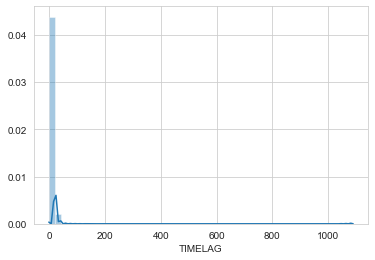

In [22]:
sns.distplot(data['TIMELAG'])

Let's start knowing how many values will be removed if we decide to drop all the values beyond the upper wisker.

In [23]:
iqr = np.percentile(data['TIMELAG'],75) - np.percentile(data['TIMELAG'],25)
upper_limit = np.percentile(data['TIMELAG'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = data[data['TIMELAG'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))

The upper wisker is at:  nan
The number of points outise the upper wisker is:  0


## Filtering outliers

Let's explore two different ways to drop outliers.

### Filter function. filter(lambda_function, column)

In [24]:
points = list(filter(lambda x: x < upper_limit, data['TIMELAG']))
len(points)

0

### Panda's approach

In [ ]:
data = data[data['TIMELAG'] < upper_limit]
sns.distplot(data['TIMELAG'])
plt.show()

# Activity:

Let's learn how the following functions work::

*   Map
*   Filter
*   Reduce

## Map

This function, applies another given function to every element of a set.
It works **elementwise**.

In [ ]:
list(map(str,range(15)))

## Filter

This other function also works elementwise but it returns the elements which met a condition.

In [ ]:
list(filter(lambda x: x %2 == 0,range(15)))

## Reduce

This other function performs some computation on a list and returns the output of that computation applied all over the list. Is **NOT ELEMENTWISE**

In [ ]:
from functools import reduce

lst = list(range(6))
print("The list is: ",lst)
print("The result of appliying the reduce over the list is: ",reduce(lambda a,b: a+b,lst))

In [ ]:
sum(lst)